In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3

In [4]:
! pip install tensorflow


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(256,256),
    batch_size=32)

Found 2152 files belonging to 3 classes.


In [6]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

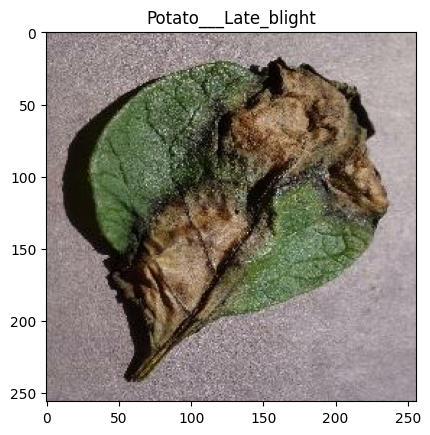

In [8]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])

In [9]:
len(dataset)*0.8

54.400000000000006

In [10]:
train_ds=dataset.take(54)
test_ds=dataset.skip(54)
val_ds=test_ds.take(6)
test_ds=test_ds.skip(6)

In [11]:
def get_dataset_partitions(dataset,train_split=0.8,val_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size=len(dataset)
    if shuffle:
        dataset=dataset.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=dataset.take(train_size)
    val_ds=dataset.skip(train_size).take(val_size)
    test_ds=dataset.skip(train_size).skip(val_size)
     
    return train_ds,val_ds,test_ds

In [12]:
train_ds,val_ds,test_ds=get_dataset_partitions(dataset)

In [13]:
len(train_ds)

54

In [14]:
len(val_ds)

6

In [15]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [17]:
resize_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [18]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

In [19]:
model=models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation="softmax"),
    
])
model.build(input_shape=input_shape)

c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 2304)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])

In [22]:
history=model.fit(
train_ds,
epochs=20,
batch_size=BATCH_SIZE,   
verbose=1,
validation_data=val_ds)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 61s 977ms/step - accuracy: 0.4883 - loss: 0.9174 - val_accuracy: 0.6875 - val_loss: 0.7099
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 852ms/step - accuracy: 0.7199 - loss: 0.6415 - val_accuracy: 0.8490 - val_loss: 0.3349
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 915ms/step - accuracy: 0.8788 - loss: 0.2990 - val_accuracy: 0.9219 - val_loss: 0.1860
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 918ms/step - accuracy: 0.9155 - loss: 0.2206 - val_accuracy: 0.8177 - val_loss: 0.4406
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 910ms/step - accuracy: 0.9400 - loss: 0.1536 - val_accuracy: 0.9167 - val_loss: 0.1862
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 808ms/step - accuracy: 0.9580 - loss: 0.1314 - val_accuracy: 0.9844 - val_loss: 0.0605
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 868ms/step - accuracy: 0.9669 - loss: 0.0896 - val_accuracy: 0.9115 - val_loss: 0.2201
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 904ms/step - accuracy: 0.9649 - loss: 0.1000 - val_accu

In [23]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 389ms/step - accuracy: 0.9771 - loss: 0.1111


[0.11921196430921555, 0.96875]

In [24]:
history

In [25]:
history.params


{'verbose': 1, 'epochs': 20, 'steps': 54}

In [26]:
 history.history["accuracy"]

[0.5306712985038757,
 0.7575231194496155,
 0.8993055820465088,
 0.8975694179534912,
 0.9386574029922485,
 0.9589120149612427,
 0.9699074029922485,
 0.9646990895271301,
 0.9612268805503845,
 0.9375,
 0.9646990895271301,
 0.9380787014961243,
 0.9565972089767456,
 0.9565972089767456,
 0.9756944179534912,
 0.9832175970077515,
 0.9797453880310059,
 0.9791666865348816,
 0.9681712985038757,
 0.9866898059844971]

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
predicted label: Potato___Late_blight


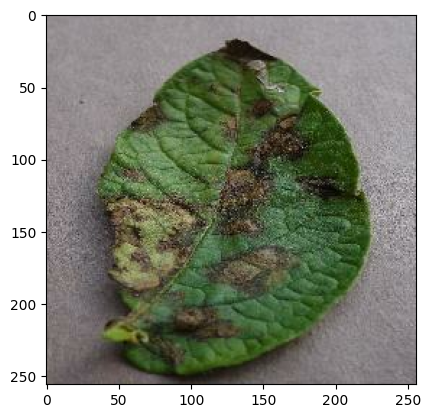

In [27]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


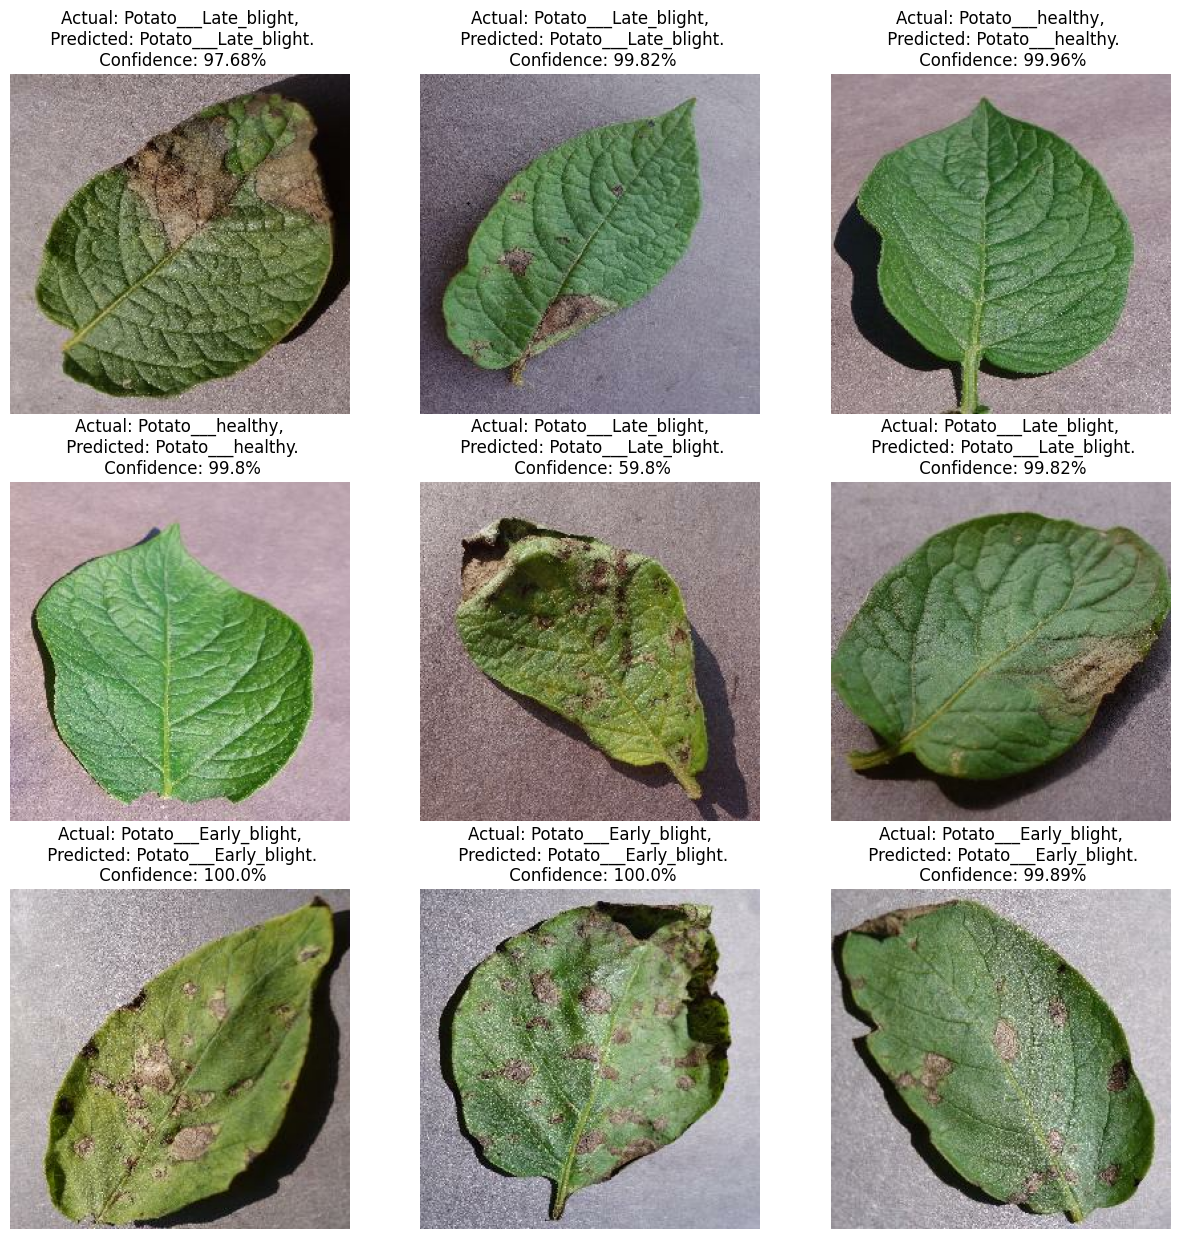

In [29]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [30]:
model_version=1
model.save(f".../models/model_v{model.version}")

AttributeError: 'Sequential' object has no attribute 'version'

In [35]:
import os

# Correct path
path = r"C:/Users/risha\Desktop\DATA SCIENCE PROJECTS/Plant Diseases/models"

# Create the directory if it does not exist
os.makedirs(path, exist_ok=True)

In [ ]:
pip install pyyaml h5py

In [37]:
model.load_weights(r'C:/Users/risha\Desktop\DATA SCIENCE PROJECTS/Plant Diseases/models/5.h5')

ValueError: Layer count mismatch when loading weights from file. Model expected 7 layers, found 0 saved layers.

In [36]:
model_version = 6
model.save(f"{path}/{model_version}.h5")


TypeError: cannot pickle 'module' object

In [ ]:
model.evaluate(test_ds)

NameError: name 'model' is not defined

In [32]:
import pickle

In [33]:
pickle.dump('model.pkl')

TypeError: dump() missing required argument 'file' (pos 2)